# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.**

> - **ScheduledDay** tells us on what day the patient set up their appointment.

> - **Neighborhood** indicates the location of the hospital.

> - **Age** = How old is the patient.

> - **Hipertension** = True or False 

> - **Diabetes**= True or False 

> - **Alcoholism** = True or False 

> - **Handcap** = True or False 

> - **SMS_received** = 1 or more messages sent to the patient. 

> - **No-show** = True or False.

> - **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>> - **‘Bolsa Família’**   It is a social welfare program of the Brazilian government, part of the Fome Zero network of federal assistance programs. Bolsa Família provides financial aid to poor Brazilian families





**Questions that I planned on exploring over the course of the report.**


    
> - **1.What is the proportion of male & Female?**

> - **2. What is the proportion of patients who visits the scheduled appointment?**

> - **3. Which is the disease most people are suffering from?**

> - **4.Frequent times of the day visiting scheduled appointment **

> - **5.What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

> - **6. Which disease is most likely to occur according to age groups**

> - **7. What is the proportion of people who has received the Bolsa Familia scholarship**

> - **8. Is there neighborhood countries who most likely visits the scheduled appointment and who don't.**

> - **9. Is there specific weekday when most patients visits to doctor**

> - **10. How likely patient comes to scheduled appointment if he/she has received the SMS**

> - **11.Baye's Theorem**

> - **12.Machine learning Approach**


### Let us import the necessary libraries.

In [262]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [263]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [264]:
print('Number of rows and columns in dataset',df.shape)

Number of rows and columns in dataset (110527, 14)


In [265]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [266]:
df.index

RangeIndex(start=0, stop=110527, step=1)

In [267]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [268]:
df.duplicated().sum()

0

In [269]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> ## - That's great!! our dataset has zero duplicate and null values.

### AppointmentID,PatientID column contains some system generated values which will not be of our use in the analysis.

In [271]:
#drop appointmentID
df.drop(['AppointmentID','PatientId'],axis = 1, inplace = True)

In [272]:
#convert all the column names to lowercase
df.columns = df.columns.str.lower()

In [273]:
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

In [274]:
#correct the columns with spelling mistakes and also for better understanding change 'no-show' column name to 'show'
df.rename({'neighbourhood': 'neighbourhood' , 'hipertension' : 'hypertension', 'no-show':'show','handcap' : 'handicap'}, axis = 1, inplace = True)

In [275]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- ###  As we have changed the name of column from **no-show** to **show**.We should also change the values accordingly.

In [276]:
#change 'No' to 'yes' and vice-versa
df['show']=df['show'].map({'No':'yes', 'Yes': 'no'})

- ### appointmentday & scheduledday both are in int.Let's convert them.

In [277]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [278]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [279]:
#get hour of the day from scheduled day column
def hr_func(ts):
    return ts.hour

df['time_hour'] = df['scheduledday'].apply(hr_func)

In [280]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16


In [281]:
#get month from appointmentday
df['appointmentmonth'] = df['appointmentday'].dt.month

In [282]:
#get year from appointmentday
df['appointmentyear'] = df['appointmentday'].dt.year

In [283]:
#get name of the weekday from appointmentday 
df['appointment_weekday'] = df['appointmentday'].dt.weekday_name

In [284]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday


In [285]:
#get month from scheduledday
df['scheduledmonth'] = df['scheduledday'].dt.month

In [286]:
#get weekday name from scheduled day
df['scheduled_weekday'] = df['scheduledday'].dt.weekday_name

In [287]:
#As we have gathered all the data required from both of these columns,let us drop them
df.drop(labels = ['scheduledday','appointmentday'],axis =1 ,inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

In [288]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday,4,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday,4,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday,4,Friday


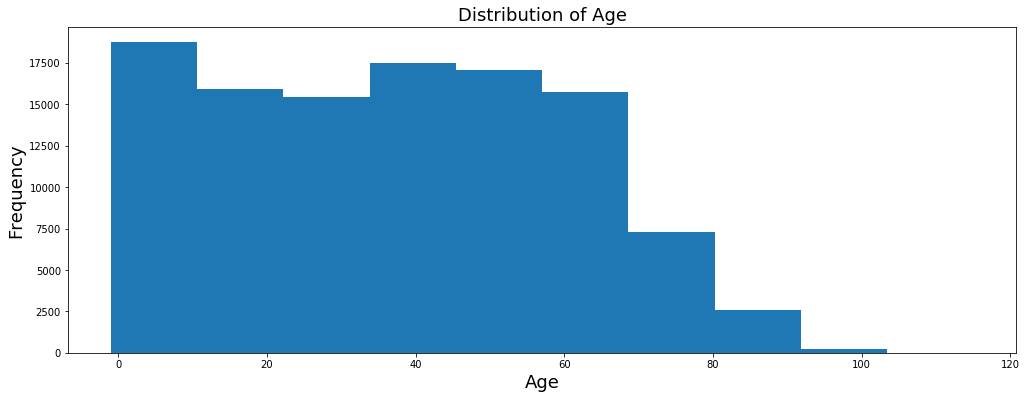

In [289]:
plt.figure(figsize = (17,6));
plt.hist(df['age']);
plt.xlabel('Age',fontsize = 18);
plt.ylabel('Frequency',fontsize = 18);
plt.title('Distribution of Age',fontsize = 18);

> ### Patient's age in our dataset ranges from 0 to 80. 0 age group being the largest among all.

- ### Let us check if our dataset contains age group below 0.

In [290]:
df[df['age'] < 0]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday
99832,F,-1,ROMÃO,0,0,0,0,0,0,yes,8,6,2016,Monday,6,Monday


- ### This might be an error because age can't be a negative number

In [291]:
# We should drop it
df.drop(index =99832 ,inplace = True)

In [292]:
#Let us confirm again.
df.shape

(110526, 16)

### Proportion of Male & Female 

In [293]:
df['gender'].value_counts(normalize = True)

F    0.649974
M    0.350026
Name: gender, dtype: float64

In [294]:
show_yes = df.query("show == 'yes'")
show_no = df.query("show == 'no'")

In [295]:
df.groupby('gender')['show'].value_counts(normalize = True)

gender  show
F       yes     0.796851
        no      0.203149
M       yes     0.800321
        no      0.199679
Name: show, dtype: float64

> -  ### 80% male & female show on their scheduled appointments

### Proportion of people show to the appointment.

In [296]:
show_height=(show_yes['show'].shape[0] / df['show'].shape[0]) *100

### Proportion of people miss the schedule appointment

In [297]:
no_show_height=(show_no['show'].shape[0] / df['show'].shape[0]) * 100

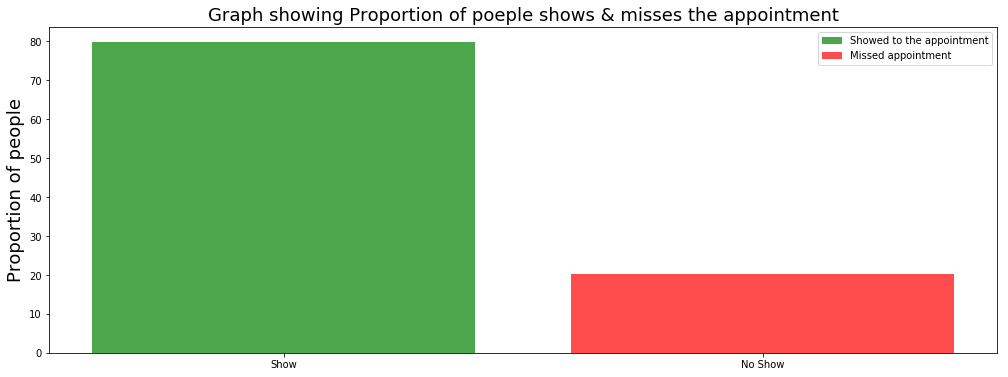

In [298]:
#set figure size of graph
plt.figure(figsize = (17,6));
#set location & height of bar graph
plt.bar(1, show_height,alpha=0.7,color = 'g',label = 'Showed to the appointment');
plt.bar(2 , no_show_height, alpha=0.7, color = 'r', label = 'Missed appointment');
location = [1,2]
label = ['Show', 'No Show']
#set ticklabels and title for the graph
plt.xticks(location,label);
plt.ylabel('Proportion of people' , fontsize = 18);
plt.title('Graph showing Proportion of poeple shows & misses the appointment',fontsize = 18);
plt.legend();

- ### Above graph depicts 80% of people comes to the scheduled appointment & 20% doesnt come.

### Let us also calculate the show rate according to gender

In [299]:
male = df.query("gender == 'M'")
female = df.query("gender == 'F'")

In [300]:
male.query("show == 'yes'").shape[0] / male.shape[0]

0.8003205211052808

In [301]:
male.query("show == 'no'").shape[0] / male.shape[0]

0.19967947889471915

- ### It shows 80% of male comes to the scheduled appointment and 20% doesn't.

In [302]:
female.query("show == 'yes'").shape[0] / female.shape[0]

0.7968512924734475

In [303]:
female.query("show == 'no'").shape[0] /female.shape[0]

0.20314870752655242

- ### It shows 80% of female comes to the scheduled appointment and 20% doesn't.

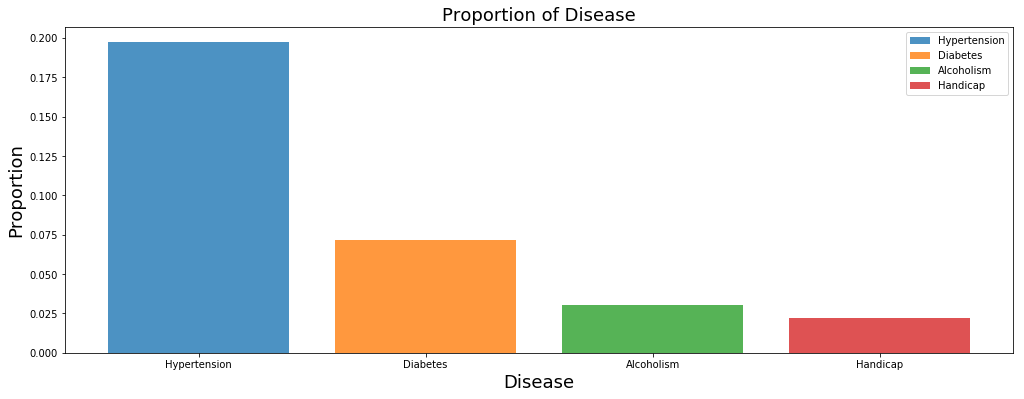

In [304]:
#set figuresize
plt.figure(figsize = (17,6));
#set bar location and Height
plt.bar(1,df['hypertension'].mean(),alpha=0.8,label = 'Hypertension');
plt.bar(2,df['diabetes'].mean(),alpha=0.8,label = 'Diabetes');
plt.bar(3,df['alcoholism'].mean(),alpha=0.8,label = 'Alcoholism');
plt.bar(4,df['handicap'].mean(),alpha=0.8,label = 'Handicap');
location = [1,2,3,4]
label = ['Hypertension','Diabetes','Alcoholism','Handicap']
location = [1,2,3,4]
#set ticklabels and title
plt.xticks(location,label);
plt.xlabel('Disease',fontsize = 18);
plt.ylabel('Proportion', fontsize = 18);
plt.title('Proportion of Disease',fontsize = 18);
plt.legend();

> ### We can observe Most of the people in our data set are suffering from Hypertension.

In [305]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday,4,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday,4,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday,4,Friday


### Calculate mean age group of people suffering from hypertension

In [306]:
df.groupby('hypertension')['age'].mean()

hypertension
0    31.308943
1    60.613596
Name: age, dtype: float64

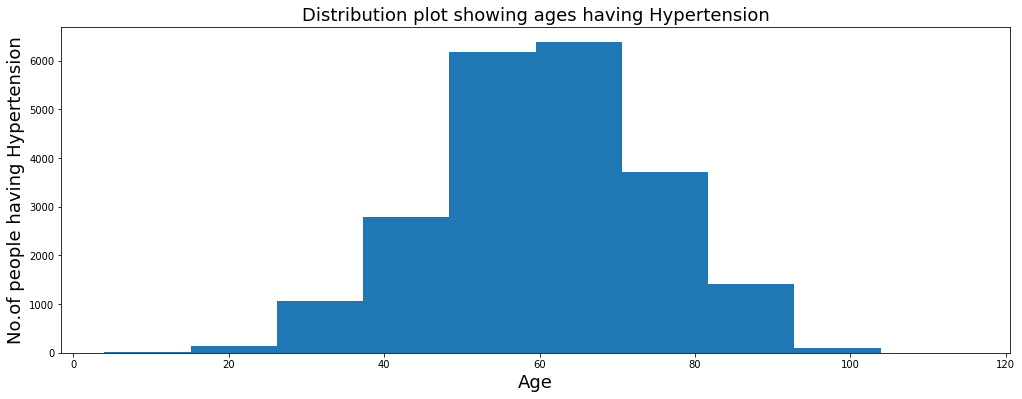

In [307]:
#set figuresize
plt.figure(figsize = (17,6));
#filter data by people having hypertension and plot a distribution
df.query("hypertension == 1")['age'].plot(kind = 'hist');
#set ticklabels and title
plt.xlabel('Age', fontsize = 18);
plt.ylabel('No.of people having Hypertension', fontsize = 18);
plt.title('Distribution plot showing ages having Hypertension',fontsize = 18);


> - ###  Graph depicts 50 to 70 age people are most likely to have Hypertension.

### Let us check if people having hypertension shows to scheduled appointment.

In [308]:
df_hyper = df.query("hypertension == 1")

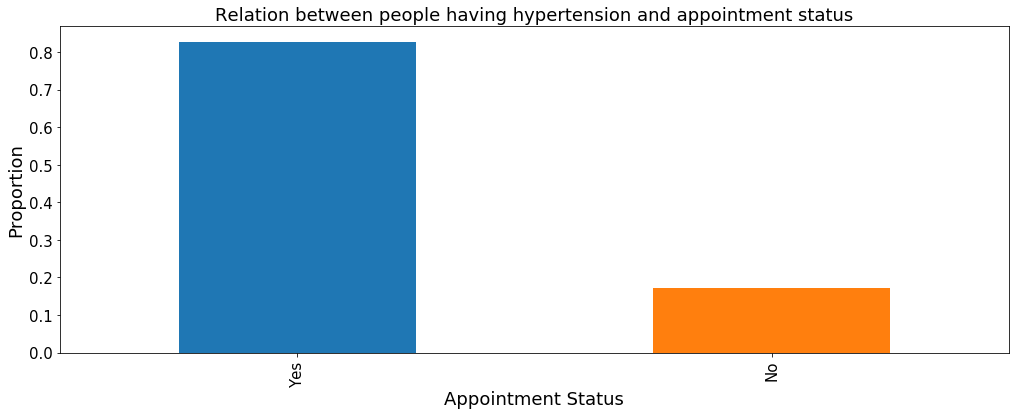

In [309]:
#set figuresize
plt.figure(figsize = (17,6));
#plot a bar graph
(df_hyper['show'].value_counts(normalize = True)).plot(kind = 'bar',fontsize = 15);
#set location and labels
locations = [0,1]
labels = ['Yes', 'No']
#set ticklabels and title
plt.xticks(locations,labels);
plt.xlabel('Appointment Status', fontsize = 18);
plt.ylabel('Proportion', fontsize = 18);
plt.title('Relation between people having hypertension and appointment status', fontsize = 18);

> - ### 80% of patients having Hypertension visit to Doctor on their Scheduled appointment

In [310]:
df.groupby('hypertension')['gender'].value_counts(normalize = True)

hypertension  gender
0             F         0.636799
              M         0.363201
1             F         0.703592
              M         0.296408
Name: gender, dtype: float64

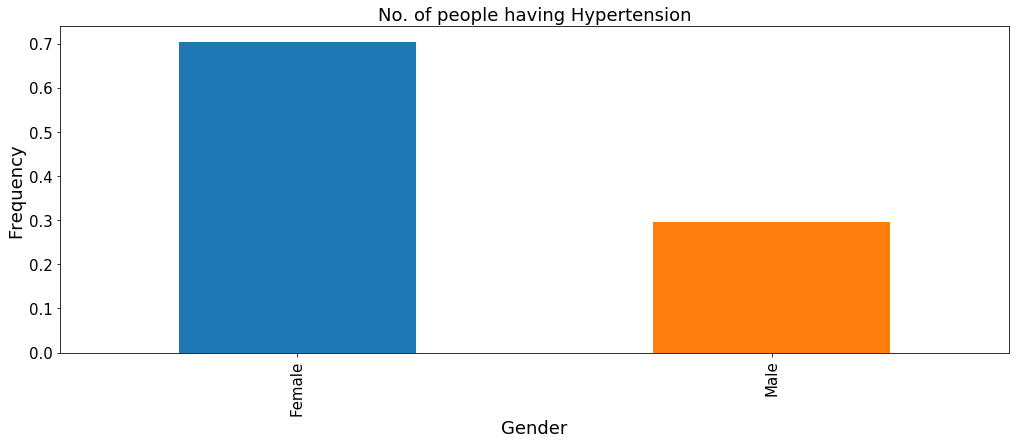

In [311]:
plt.figure(figsize = (17,6));
df_hyper['gender'].value_counts(normalize = True).plot(kind = 'bar',fontsize = 15);
locations = [0,1]
labels = ['Female', 'Male']
plt.xticks(locations,labels);
plt.xlabel('Gender', fontsize = 18);
plt.ylabel('Frequency', fontsize = 18);
plt.title('No. of people having Hypertension', fontsize = 18);

> - ### Graph shows More number of females are suffering from hypertension than males

### Is there any relation between disease and people visiting on their appointment?

In [312]:
df.groupby('hypertension')['show'].value_counts(normalize = True)

hypertension  show
0             yes     0.790961
              no      0.209039
1             yes     0.826980
              no      0.173020
Name: show, dtype: float64

In [313]:
df.groupby('diabetes')['show'].value_counts(normalize = True)

diabetes  show
0         yes     0.796370
          no      0.203630
1         yes     0.819967
          no      0.180033
Name: show, dtype: float64

In [314]:
df.groupby('alcoholism')['show'].value_counts(normalize = True)

alcoholism  show
0           yes     0.798052
            no      0.201948
1           yes     0.798512
            no      0.201488
Name: show, dtype: float64

In [315]:
df.groupby('diabetes')['gender'].value_counts(normalize = True)

diabetes  gender
0         F         0.645653
          M         0.354347
1         F         0.705779
          M         0.294221
Name: gender, dtype: float64

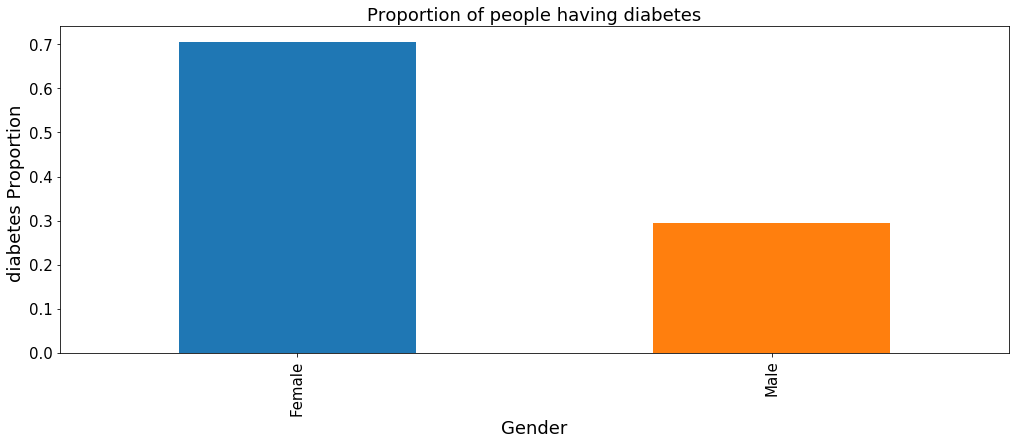

In [316]:
#set figuresize
plt.figure(figsize = (17,6));
#plot bargraph depicting rate of diabetes
df.groupby('diabetes')['gender'].value_counts(normalize = True)[1].plot(kind = 'bar',fontsize = 15);
location = [0,1]
labels = ['Female','Male']
#set xticks,labels and location
plt.xticks(location,labels);

plt.xlabel('Gender', fontsize = 18);
plt.ylabel('diabetes Proportion ', fontsize = 18);
plt.title('Proportion of people having diabetes', fontsize = 18);

> - ### 70% of Female are suffering from diabetes whereas 30% of male are suffering from diabetes

In [317]:
df.groupby('handicap')['gender'].value_counts(normalize = True)

handicap  gender
0         F         0.651512
          M         0.348488
1         F         0.578355
          M         0.421645
2         F         0.573770
          M         0.426230
3         M         0.769231
          F         0.230769
4         M         0.666667
          F         0.333333
Name: gender, dtype: float64

In [318]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday,4,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday,4,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday,4,Friday


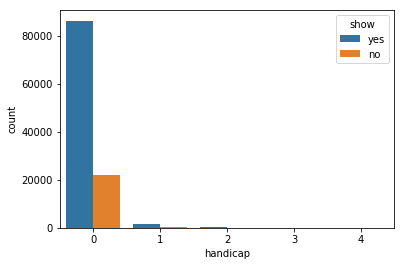

In [319]:
sns.countplot(df['handicap'],hue = df['show'],data= df);

In [320]:
df.groupby('handicap')['show'].value_counts(normalize = True)

handicap  show
0         yes     0.797645
          no      0.202355
1         yes     0.820764
          no      0.179236
2         yes     0.797814
          no      0.202186
3         yes     0.769231
          no      0.230769
4         yes     0.666667
          no      0.333333
Name: show, dtype: float64

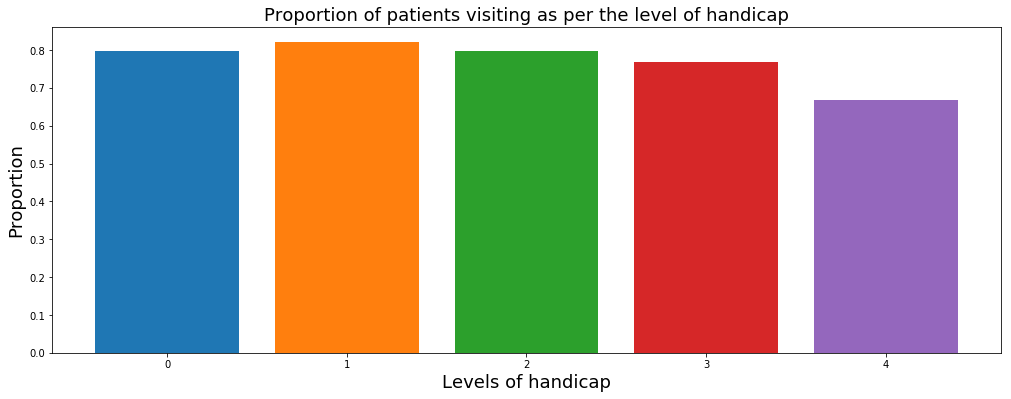

In [321]:
plt.figure(figsize =(17,6));
plt.bar(0,df.groupby('handicap')['show'].value_counts(normalize = True)[0]['yes']);
plt.bar(1,df.groupby('handicap')['show'].value_counts(normalize = True)[1]['yes']);
plt.bar(2,df.groupby('handicap')['show'].value_counts(normalize = True)[2]['yes']);
plt.bar(3,df.groupby('handicap')['show'].value_counts(normalize = True)[3]['yes']);
plt.bar(4,df.groupby('handicap')['show'].value_counts(normalize = True)[4]['yes']);
plt.xlabel('Levels of handicap',fontsize = 18);
plt.ylabel('Proportion',fontsize = 18);
plt.title('Proportion of patients visiting as per the level of handicap',fontsize = 18);


>  - ### 82% of the patient from Level1 visit on their scheduled appointment followed by Level0,Level2,Level3.Only 66% from level4 shows up.


In [322]:
df.groupby('alcoholism')['gender'].value_counts(normalize = True)

alcoholism  gender
0           F         0.658940
            M         0.341060
1           M         0.636012
            F         0.363988
Name: gender, dtype: float64

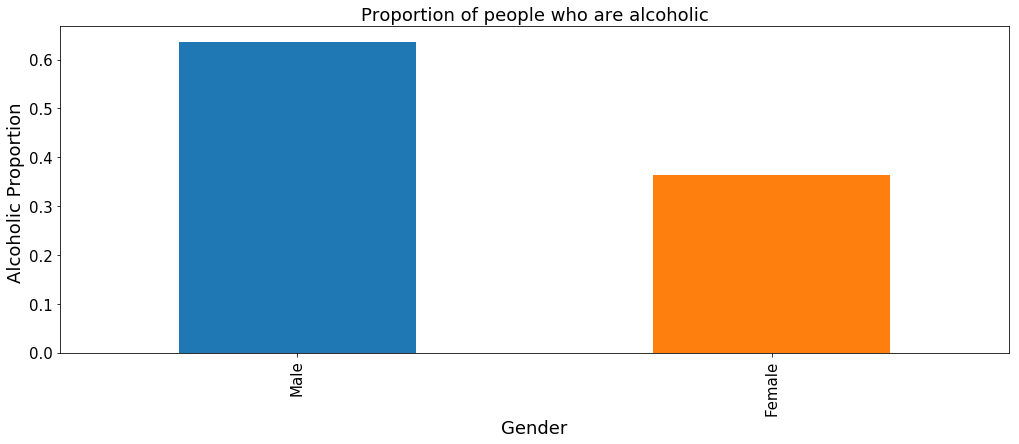

In [323]:
#set figuresize
plt.figure(figsize = (17,6));
#plot bargraph depicting rate of alcohlism
df.groupby('alcoholism')['gender'].value_counts(normalize = True)[1].plot(kind = 'bar',fontsize = 15);
location = [0,1]
labels = ['Male','Female']
#set xticks,labels and location
plt.xticks(location,labels);

plt.xlabel('Gender', fontsize = 18);
plt.ylabel('Alcoholic Proportion ', fontsize = 18);
plt.title('Proportion of people who are alcoholic', fontsize = 18);

> - ### 60% of male are alcoholic while 40% of female are alcoholic

### Frequent times of the day for visiting the scheduled appointment

In [324]:
df_show  =df.query("show == 'yes'")

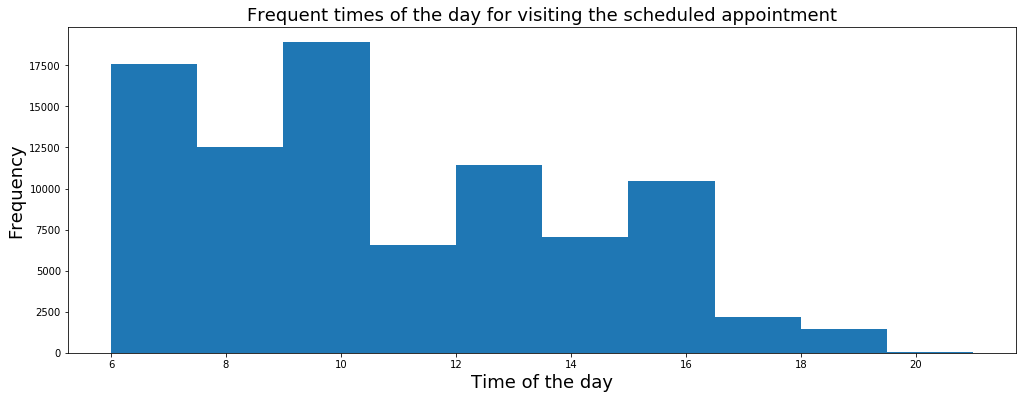

In [325]:
#set figuresize
plt.figure(figsize = (17,6));
#plot graph
plt.hist(df_show['time_hour']);
#set ticklabels and title
plt.xlabel('Time of the day', fontsize = 18);
plt.ylabel('Frequency', fontsize = 18);
plt.title('Frequent times of the day for visiting the scheduled appointment',fontsize = 18);

> - ### graph shows 6a.m. to 5p.m are most frequent times 

In [326]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday,4,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday,4,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday,4,Friday


In [327]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

### Disease as per the age groups

In [328]:
#set four different levels of age group
bin_labels = ['child', 'young', 'middle_age', 'senior']
bin_edges = [0,13,30,50,116]
df['age_grouped']=pd.cut(df['age'], bins = bin_edges, labels = bin_labels,include_lowest = True)

In [329]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday,age_grouped
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday,4,Friday,senior
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday,senior
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday,senior
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday,4,Friday,child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday,4,Friday,senior


In [330]:
df['appointmentmonth'].unique()

array([4, 5, 6], dtype=int64)

In [331]:
df.groupby('age_grouped')['show'].value_counts(normalize = True)

age_grouped  show
child        yes     0.791770
             no      0.208230
young        yes     0.749702
             no      0.250298
middle_age   yes     0.792956
             no      0.207044
senior       yes     0.838325
             no      0.161675
Name: show, dtype: float64

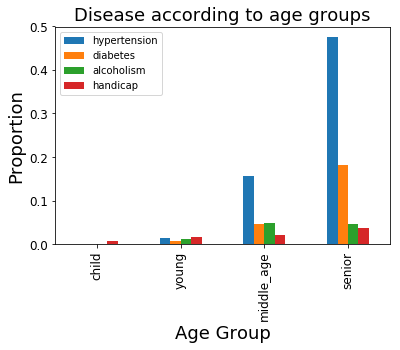

In [332]:
#use groupby and take the mean  
df.groupby('age_grouped').mean()[['hypertension','diabetes','alcoholism','handicap']].plot(kind = 'bar',fontsize = 12);
#set labels and title
plt.xlabel('Age Group', fontsize = 18);
plt.ylabel('Proportion', fontsize = 18);
plt.title('Disease according to age groups', fontsize = 18);


### Graph depicts Senior people are having highest proportion of Hypertension,Diabetes followed by Middle age group and as expected child group doesnt seem to have any of the major disease except handicap.

In [333]:
show_appoi=df.query("show == 'yes'")

In [334]:
show_appoi.shape

(88207, 17)

In [335]:
show_appoi['age'].mean()

37.790504154999034

In [336]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday,age_grouped
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday,4,Friday,senior
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday,senior
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday,senior
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday,4,Friday,child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday,4,Friday,senior


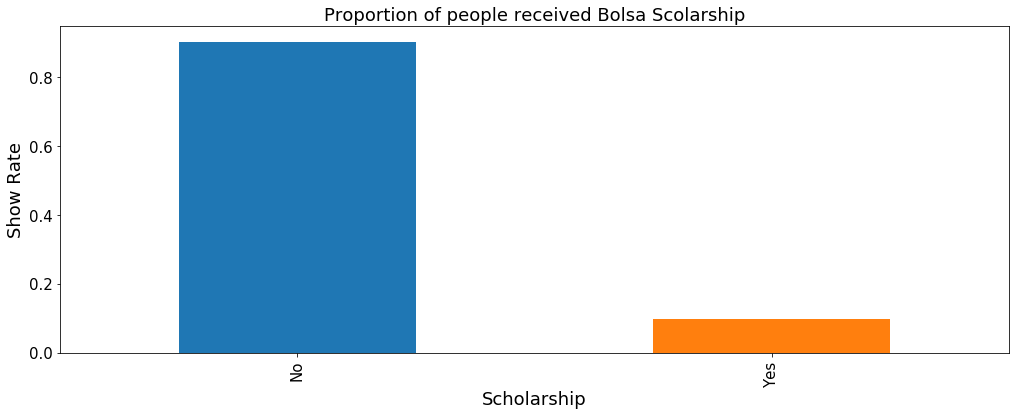

In [337]:
plt.figure(figsize = (17,6));
df['scholarship'].value_counts(normalize = True).plot(kind = 'bar',fontsize = 15);
labels= ['No','Yes']
locations = [0,1]
plt.xticks(locations,labels);
plt.xlabel('Scholarship',fontsize = 18);
plt.ylabel('Show Rate',fontsize = 18);
plt.title('Proportion of people received Bolsa Scolarship',fontsize = 18);

> -  ### It shows 1% of people have received Bolsa Familia Scholarship which indeed suggest us that these are the people in our dataset who are financially poor.

In [338]:
df.groupby('scholarship')['show'].value_counts(normalize = True)

scholarship  show
0            yes     0.801926
             no      0.198074
1            yes     0.762637
             no      0.237363
Name: show, dtype: float64

> - ### 76% of the finacially poor people visits the scheduled appointment.

In [339]:
df.groupby('scholarship')['gender'].value_counts(normalize = True)

scholarship  gender
0            F         0.631977
             M         0.368023
1            F         0.815118
             M         0.184882
Name: gender, dtype: float64

> - ### 81% of female have received Bolsa Familia scholarship among those 1% financially poor people

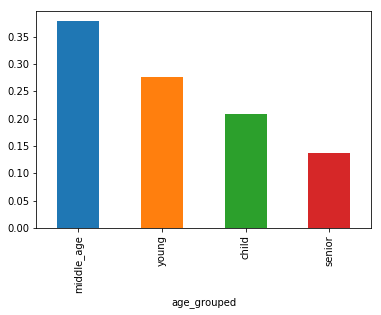

In [340]:
df.groupby('scholarship')['age_grouped'].value_counts(normalize = True)[1].plot(kind = 'bar');

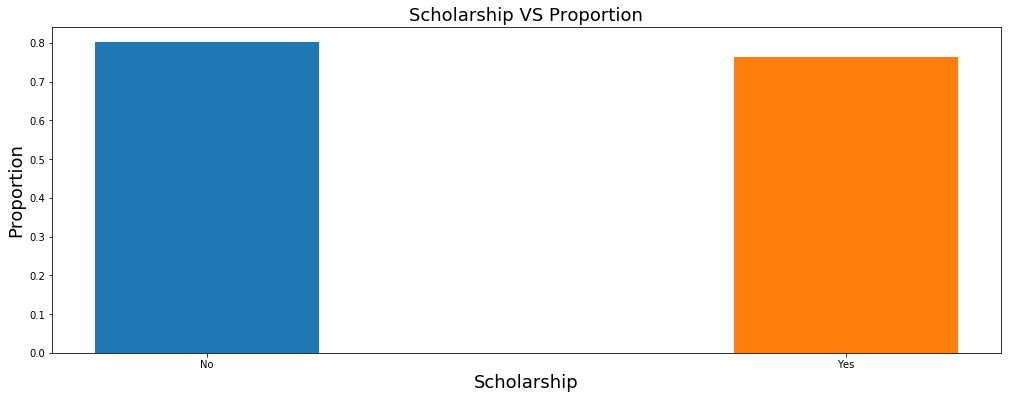

In [341]:
plt.figure(figsize = (17,6));
plt.bar(0,df.groupby('scholarship')['show'].value_counts(normalize = True)[0]['yes'],width = 0.35);
plt.bar(1,df.groupby('scholarship')['show'].value_counts(normalize = True)[1]['yes'],width = 0.35);
label = ['No', 'Yes']
location = [0,1]
plt.xticks(location,label)
plt.xlabel('Scholarship',fontsize =18);
plt.ylabel('Proportion',fontsize = 18);
plt.title('Scholarship VS Proportion',fontsize = 18);

> - ### 80% of patients who haven't received Scholarship visits to Doctor whereas 76% of patients who have received visits.

In [342]:
no_scholarship=df.groupby(['scholarship','age_grouped'])['show'].value_counts(normalize = True)[0]
yes_scholarship=df.groupby(['scholarship','age_grouped'])['show'].value_counts(normalize = True)[1]

In [343]:
yes_scholarship

age_grouped  show
child        yes     0.773210
             no      0.226790
young        yes     0.722148
             no      0.277852
middle_age   yes     0.771755
             no      0.228245
senior       yes     0.802959
             no      0.197041
Name: show, dtype: float64

> - ### Above result again indicates rate of people visiting the scheduled appointment is more than missing the appointment.

In [344]:
df.groupby('scholarship').mean()[['hypertension','diabetes','alcoholism','handicap']]

,hypertension,diabetes,alcoholism,handicap
scholarship,,,,
0,0.199839,0.073988,0.028415,0.022706
1,0.173465,0.052389,0.048614,0.018046


> - ### It shows irrespective of receiving scholarship people are suffering more from hypertension.

In [345]:

df['neighbourhood'].value_counts()[0:5]


JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: neighbourhood, dtype: int64

In [346]:
df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack()[0:5]

show,no,yes
neighbourhood,,
AEROPORTO,0.125000,0.875000
ANDORINHAS,0.230327,0.769673
ANTÔNIO HONÓRIO,0.184502,0.815498
ARIOVALDO FAVALESSA,0.219858,0.780142
BARRO VERMELHO,0.215130,0.784870


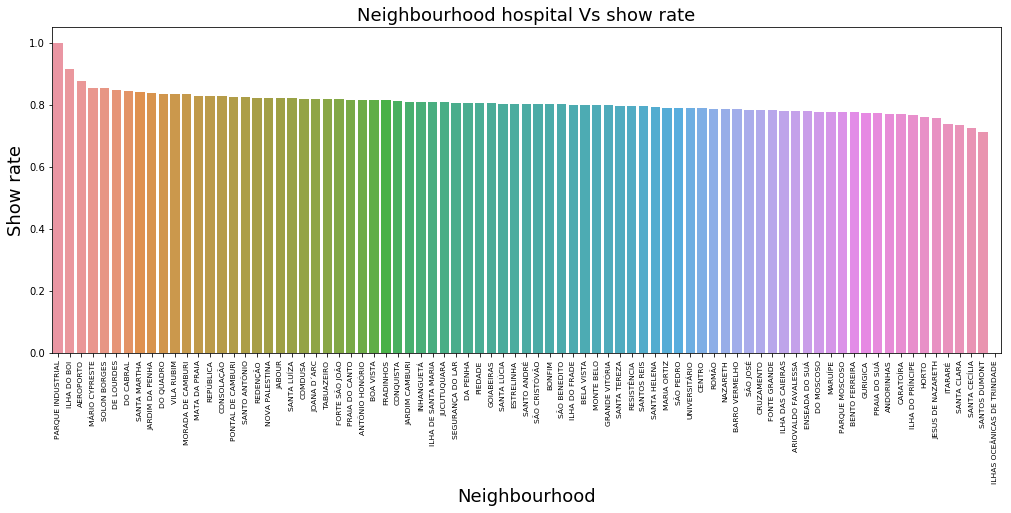

In [347]:
plt.figure(figsize = (17,6));
ax=sns.barplot(x=df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack()['yes'].index , 
            y=df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack()['yes'],data=df,
        order =df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack().sort_values(by = 'yes',ascending = False).index );
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 7.6);
plt.xlabel('Neighbourhood',fontsize = 18);
plt.ylabel('Show rate',fontsize = 18);
plt.title('Neighbourhood hospital Vs show rate',fontsize = 18);

> - ### Graph depicts neighbourhood hospitals where patients more likely to visit

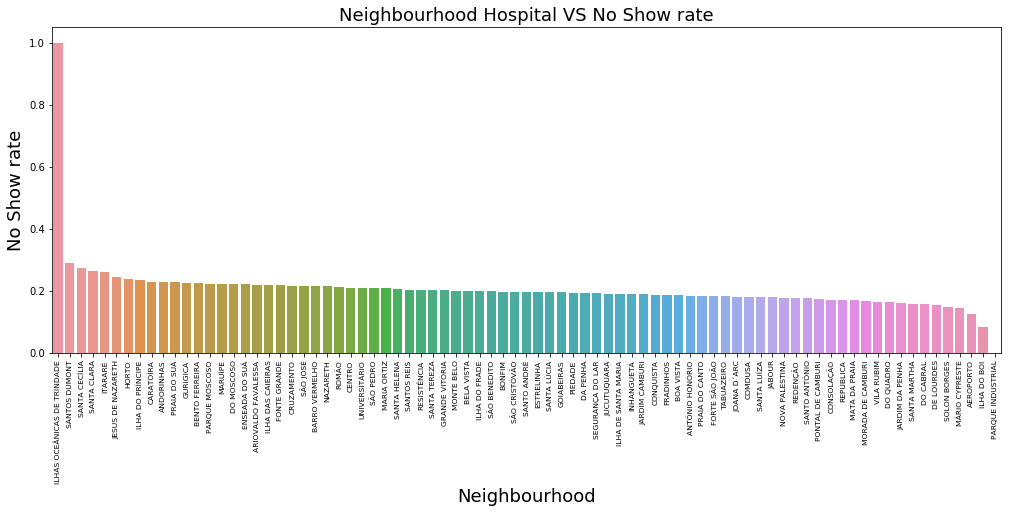

In [348]:
plt.figure(figsize = (17,6));
ax=sns.barplot(x=df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack().index , 
            y=df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack()['no'],data=df,
         order =df.groupby('neighbourhood')['show'].value_counts(normalize = True).unstack().sort_values(by = 'no',ascending = False).index );
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 7.6);
plt.xlabel('Neighbourhood',fontsize = 18);
plt.ylabel('No Show rate',fontsize = 18);
plt.title('Neighbourhood Hospital VS No Show rate',fontsize = 18);

> - ### Graph depicts neighbourhood hospitals where patients aren't  likely to visit

In [349]:
print('Average No. of people have received the SMS is', df['sms_received'].mean())

Average No. of people have received the SMS is 0.3210285362720084


In [350]:
df.groupby('sms_received')['show'].value_counts(normalize = True)

sms_received  show
0             yes     0.832965
              no      0.167035
1             yes     0.724255
              no      0.275745
Name: show, dtype: float64

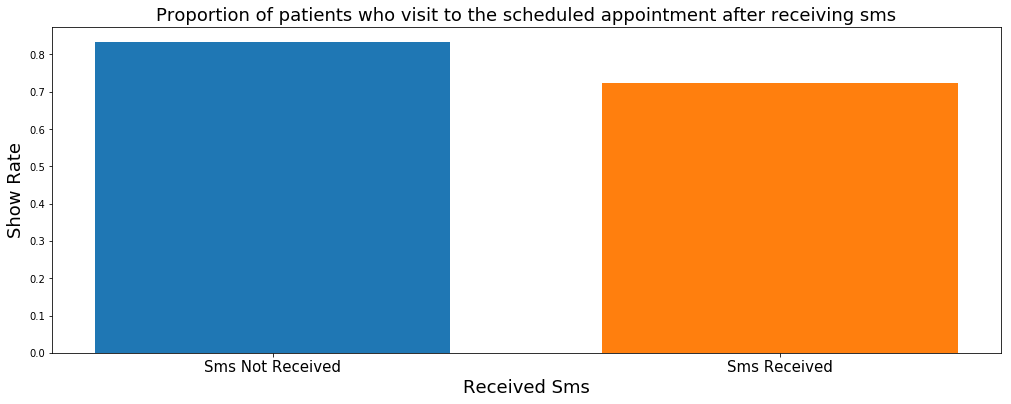

In [351]:
plt.figure(figsize = (17,6));
ind =np.arange(1)
plt.bar(ind,df.groupby('sms_received')['show'].value_counts(normalize = True)[0]['yes'],width = 0.35);
plt.bar(ind+0.5,df.groupby('sms_received')['show'].value_counts(normalize = True)[1]['yes'],width = 0.35);
location = [0,0.5]
labels = ['Sms Not Received', 'Sms Received']
plt.xticks(location,labels,fontsize = 15);
plt.xlabel('Received Sms',fontsize = 18);
plt.ylabel('Show Rate',fontsize = 18);
plt.title('Proportion of patients who visit to the scheduled appointment after receiving sms',fontsize = 18);

### Even if 68% of the patients do not receive sms they do visit the scheduled appointment & has higher proportion than the one's who have received sms.

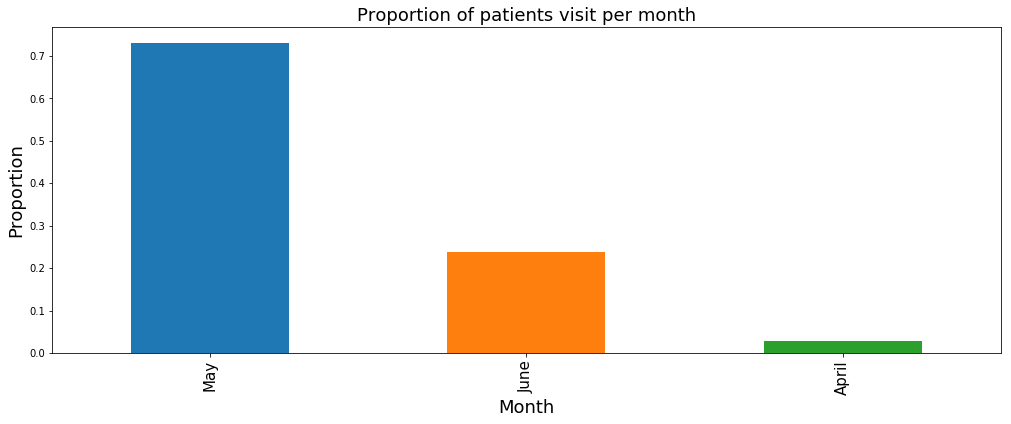

In [352]:
plt.figure(figsize = (17,6));
df['appointmentmonth'].value_counts(normalize = True).plot(kind = 'bar');
location = [0,1,2]
labels = ['May','June','April']
plt.xticks(location,labels,fontsize = 15)
plt.xlabel('Month',fontsize = 18);
plt.ylabel('Proportion',fontsize = 18);

plt.title('Proportion of patients visit per month', fontsize = 18);

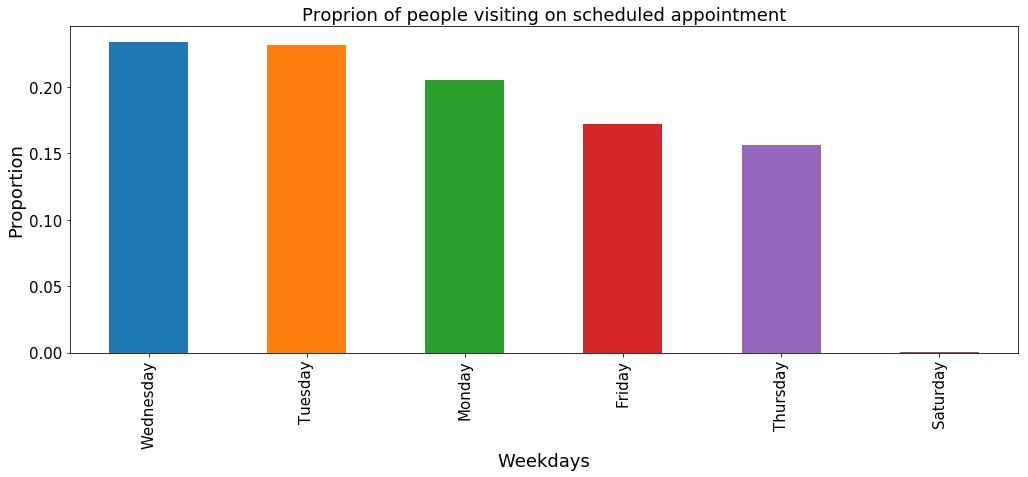

In [353]:
plt.figure(figsize = (17,6));
df['appointment_weekday'].value_counts(normalize = True).plot(kind = 'bar',fontsize = 15);
plt.xlabel('Weekdays',fontsize =18 );
plt.ylabel('Proportion',fontsize =18 );
plt.title('Proprion of people visiting on scheduled appointment',fontsize = 18);


> - ### On wednesday,Tuesday 23% of people visits the scheduled appointment and least number of people visits on saturday.

In [354]:
weekday=df.groupby('appointment_weekday')['show'].value_counts(normalize = True).reset_index(name= 'count')
weekday

,appointment_weekday,show,count
0,Friday,yes,0.787739
1,Friday,no,0.212261
2,Monday,yes,0.793519
3,Monday,no,0.206481
4,Saturday,yes,0.769231
5,Saturday,no,0.230769
6,Thursday,yes,0.806459
7,Thursday,no,0.193541
8,Tuesday,yes,0.799064
9,Tuesday,no,0.200936


In [355]:
show_height01 = weekday.query("show== 'yes'")
show_height01

,appointment_weekday,show,count
0,Friday,yes,0.787739
2,Monday,yes,0.793519
4,Saturday,yes,0.769231
6,Thursday,yes,0.806459
8,Tuesday,yes,0.799064
10,Wednesday,yes,0.803108


In [356]:
noshow_height01 = weekday.query("show== 'no'")
noshow_height01

,appointment_weekday,show,count
1,Friday,no,0.212261
3,Monday,no,0.206481
5,Saturday,no,0.230769
7,Thursday,no,0.193541
9,Tuesday,no,0.200936
11,Wednesday,no,0.196892


In [357]:
ind=np.arange(0,6)

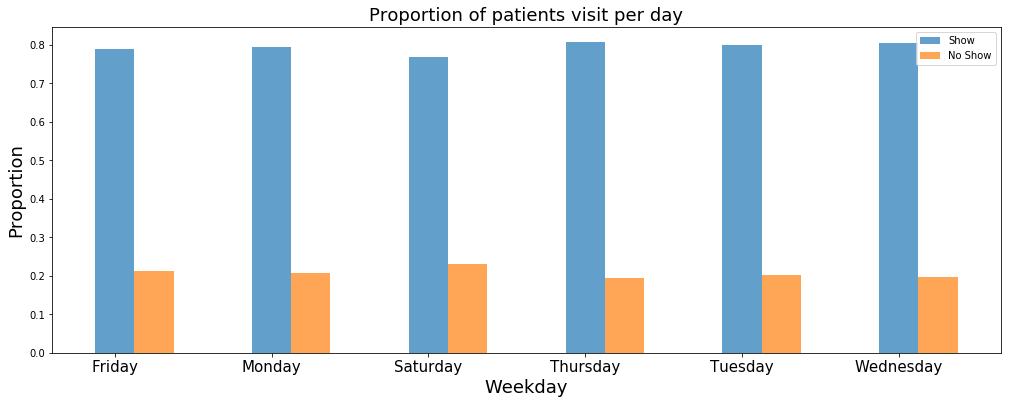

In [358]:
plt.figure(figsize = (17,6));
plt.bar(ind,show_height01['count'],alpha= 0.7,label = 'Show',width = 0.25);
plt.bar(ind+0.25,noshow_height01['count'],alpha=0.7,label = 'No Show',width=0.25);
location = [0,1,2,3,4,5]
labels = ['Friday','Monday','Saturday','Thursday','Tuesday','Wednesday']
plt.xticks(location,labels,fontsize = 15)
plt.xlabel('Weekday',fontsize = 18);
plt.ylabel('Proportion',fontsize = 18);
plt.title('Proportion of patients visit per day', fontsize = 18);

plt.legend();

> -  ### We can observe the trend here 80% of the patients do visit on their scheduled appointment & 20% of the patients fail

### Bayes Theorem

### Probability of patient who has hypertension visits the scheduled appointment.

>- ### P(show|hypertension)

In [359]:
df.query("hypertension == 1")['show'].value_counts(normalize= True)

yes    0.82698
no     0.17302
Name: show, dtype: float64

### Probability of patient who has diabetes visits the scheduled appointment.

>- ### P(show|diabetes)

In [360]:
df.query("diabetes == 1")['show'].value_counts(normalize= True)

yes    0.819967
no     0.180033
Name: show, dtype: float64

### Probability of patient who is alcoholic visits the scheduled appointment.

>- ### P(show|alcoholic)

In [361]:
df.query("alcoholism == 1")['show'].value_counts(normalize= True)

yes    0.798512
no     0.201488
Name: show, dtype: float64

### Probability of patient who are handicap visits the scheduled appointment.

>- ### P(show|handicap)

In [362]:
df.query("handicap == 1")['show'].value_counts(normalize= True)

yes    0.820764
no     0.179236
Name: show, dtype: float64

### Probability of patient visits the scheduled appointment who has hypertension
> - ### P(hypertension|show)

In [363]:
df.query("show == 'yes'")['hypertension'].value_counts(normalize = True)

0    0.795606
1    0.204394
Name: hypertension, dtype: float64

### Probability of patient visits the scheduled appointment who has diabetes
> - ### P(diabetes|show)

In [364]:
df.query("show == 'yes'")['diabetes'].value_counts(normalize = True)

0    0.926162
1    0.073838
Name: diabetes, dtype: float64

### Probability of patient visits the scheduled appointment who is handicap
> - ### P(handicap|show)

In [365]:
df.query("show == 'yes'")['handicap'].value_counts(normalize = True)

0    0.979208
1    0.019001
2    0.001655
3    0.000113
4    0.000023
Name: handicap, dtype: float64

### Probability of patient visits the scheduled appointment who is alcoholic
> - ### P(alcoholism|show)

In [366]:
df.query("show == 'yes'")['alcoholism'].value_counts(normalize = True)

0    0.969583
1    0.030417
Name: alcoholism, dtype: float64

In [367]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,appointmentmonth,appointmentyear,appointment_weekday,scheduledmonth,scheduled_weekday,age_grouped
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,18,4,2016,Friday,4,Friday,senior
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday,senior
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,16,4,2016,Friday,4,Friday,senior
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,17,4,2016,Friday,4,Friday,child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,16,4,2016,Friday,4,Friday,senior


In [368]:
df_new = df.copy()

In [369]:
df_new.drop(labels = ['appointmentmonth','appointmentyear','appointment_weekday',
                      'scheduledmonth','scheduled_weekday','neighbourhood'],axis =1, inplace= True)

In [370]:
df_new.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,age_grouped
0,F,62,0,1,0,0,0,0,yes,18,senior
1,M,56,0,0,0,0,0,0,yes,16,senior
2,F,62,0,0,0,0,0,0,yes,16,senior
3,F,8,0,0,0,0,0,0,yes,17,child
4,F,56,0,1,1,0,0,0,yes,16,senior


In [371]:
df_new[['no','yes']] = pd.get_dummies(df_new['show'])

In [372]:
df_new[['child','young','middle_age','senior']] = pd.get_dummies(df_new['age_grouped'])

In [373]:
df_new.loc[:,['age_grouped','child','middle_age','senior','young']].head(5)

,age_grouped,child,middle_age,senior,young
0,senior,0,0,1,0
1,senior,0,0,1,0
2,senior,0,0,1,0
3,child,1,0,0,0
4,senior,0,0,1,0


## Machine Learning Model

In [374]:
import statsmodels.api as sm

In [375]:
from scipy import stats

In [376]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [377]:
df_new['intercept'] = 1
log_mod = sm.Logit(df_new['yes'], df_new[['intercept','hypertension','diabetes','alcoholism','handicap','child','middle_age','young']])
results =log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.179357
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:               110526
Model:                          Logit   Df Residuals:                   110518
Method:                           MLE   Df Model:                            7
Date:                Tue, 22 May 2018   Pseudo R-squ.:                0.003654
Time:                        22:27:22   Log-Likelihood:                -19824.
converged:                       True   LL-Null:                       -19896.
                                        LLR p-value:                 3.742e-28
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.6554      0.018     90.163      0.000       1.619       1.691
hypertension     0.0179      0.024      0.729      0.466      -0.030       0.066
diabetes        -0.0823      0.034     -2.426      0.015      -0.149      -0.016
alcoholism      -0.0894      0.044     -2.020      0.043      -0.176      -0.003
handicap         0.0380      0.048      0.787      0.431      -0.057       0.133
child           -0.3199      0.025    -12.954      0.000      -0.368      -0.272
middle_age      -0.3077      0.022    -14.140      0.000      -0.350      -0.265
young           -0.5577      0.024    -23.700      0.000      -0.604      -0.512
================================================================================
"""

In [378]:
np.exp(results.params)

intercept       5.235092
hypertension    1.018033
diabetes        0.920960
alcoholism      0.914487
handicap        1.038776
child           0.726217
middle_age      0.735125
young           0.572514
dtype: float64

> #### For each increment  in Hypertension patient visit to Doctor increases by 1.01.

> #### For each increment in Diabetes pateint visit to Doctor decreases by 0.9209.

> #### For each increment in Alcoholic person  visit to Doctor decreases by 0.9144.

> #### For each increment  in Handicap patient visit to Doctor increases by 1.03.

> #### If a patient belong to child group showing to the scheduled appointment is 0.726 times as less  likely as compared to senior group holding all other parameters constant.

> #### If a patient belong to middle_age group showing to the scheduled appointment is 0.735 times as less likely as compared to senior group holding all other parameters constant.

> #### If a patient belong to young group showing to the scheduled appointment is 0.572 times as less likely as compared to senior group holding all other parameters constant.

> ### Probability

>> - #### slope of Diabetes and alcoholism is not equal to zero the are statistically significant in relation to show whereas handicap and hypertension are not statistically significant.child,young,middle_age coefficients suggest that they are statistically significant in relation with senior coefficient.

In [379]:
1/np.exp(results.params) 

intercept       0.191019
hypertension    0.982286
diabetes        1.085824
alcoholism      1.093509
handicap        0.962672
child           1.376999
middle_age      1.360313
young           1.746681
dtype: float64

> #### For each decrement in Hypertension patient visit to Doctor decreases by 0.9822.

> #### For each decrement in Diabetes pateint visit to Doctor increases by 1.08582.

> #### For each decrement  in Alcoholic person  visit to Doctor increases by 1.0935.

> #### For  each decrement  in Handicap patient visit to Doctor decreases by 0.9626.

> #### If a patient belong to senior group showing to the scheduled appointment is 1.376  times as more  likely as compared to child group holding all other parameters constant.

> #### If a patient belong to senior group showing to the scheduled appointment is 1.360 times as more likely as compared to middle_age group holding all other parameters constant.

> #### If a patient belong to senior group showing to the scheduled appointment is 1.746 times as more likely as compared to young group holding all other parameters constant.

In [380]:
df_new.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_hour,age_grouped,no,yes,child,young,middle_age,senior,intercept
0,F,62,0,1,0,0,0,0,yes,18,senior,0,1,0,0,0,1,1
1,M,56,0,0,0,0,0,0,yes,16,senior,0,1,0,0,0,1,1
2,F,62,0,0,0,0,0,0,yes,16,senior,0,1,0,0,0,1,1
3,F,8,0,0,0,0,0,0,yes,17,child,0,1,1,0,0,0,1
4,F,56,0,1,1,0,0,0,yes,16,senior,0,1,0,0,0,1,1


In [381]:
X = df_new[['hypertension','diabetes','alcoholism','handicap']]
y = df_new['yes']

In [382]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
from sklearn.metrics import accuracy_score

In [385]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.40, random_state = 0)

In [386]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_preds = knn.predict(X_test)
accuracy_score(y_test,y_preds)

0.7983307321707267

In [387]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_preds=logreg.predict(X_test)
accuracy_score(y_test,y_preds)

0.7990319151342427

<a id='conclusions'></a>

<a id='conclusions'></a>
## Conclusion

> 1. Observerd age group of patients in our dataset is from 0 to 80.

> 2. Hypertension is observed more followed by diabetes,Alcoholism,Handicap. 

> 3. Senior people (age above 50) are most likely suffering from hypertension and child are most likely handicap.

> 4. More number of female are suffering from Hypertension and diabetes whereas male are more likely to suffering from alcoholism.

> 5. Irrespective of gender 80% of people visit to their scheduled appointments & that's a good sign It shows people do care about their health issues.

> 6. 1% of people in our dataset have received Bolsa Familia scholarship and out of that Middle age group happen to receive highest rate of scholarship

> 7. Parque Industrial,Ilha Do Boi,Aeroporto,Mario Cypreste,Solon Borges are the location of hospitals people most likely visit,
 Ilhas Oceanicas DE Trindade,Santos Dumont,Santa Cecilia,Santa Clara,Itarare are the location of hospitals people most likely don't visit
	
> 8. It shows people who haven't received SMS visit on their scheduled appointment so,receiving SMS is not particularly a good parameter to predict if patient will show or not

> 9. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>> - Disease,age group,SMS,scholarship,month,weekday are the top paramenters in predicting if patient will show up on the scheduled appointment.
   



## Limitation

> - We had only 1% of whole dataset for people who have received scholarship & those are the people who  are financially poor.
That means we were not having sufficient data to arrive to any robust conclusion for those 1% of patients.
> - Also the dataset contains only 3 month information from 2016, information from rest of the months could have been more useful in analysing.

## Reference

- Data analysis in Python with pandas: [Data School](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)

- Bolsa Familia Scholarship: [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

- And everyone on discussion forums who have solved my doubts

In [388]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No show appointments dataset.ipynb'])

0